In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/smsspamcollection.tsv', sep= '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.shape

(5572, 4)

data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [6]:
df1= df.drop(columns=['length', 'punct'])

In [7]:
df1.sample(5)

,label,message
1795,ham,How much i gave to you. Morning.
3818,ham,This is my number by vivek..
1950,ham,Wait 2 min..stand at bus stop
1524,ham,Yup ok thanx...
139,spam,You'll not rcv any more msgs from the chat svc...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
encoder.fit_transform(df1['label'])

array([0, 0, 1, ..., 0, 0, 0])

In [10]:
df1['label'] = encoder.fit_transform(df1['label'])

it learns the parameter from the data(fit)
it transforms the data(one hot encoding)


In [11]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df1.isnull().sum()

,0
label,0
message,0


In [13]:
df1.duplicated().sum()

np.int64(403)

In [14]:
df1.drop_duplicates(keep='first')

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


eda

In [15]:
df1.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df1['label'].value_counts()

,count
label,
0,4825
1,747


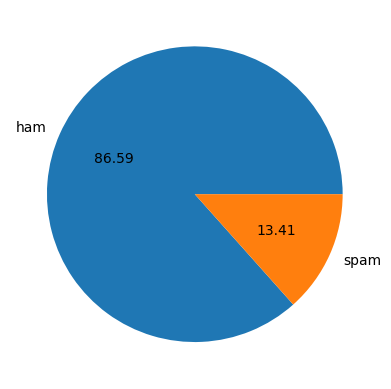

In [20]:
import matplotlib.pyplot as plt
plt.pie(df1['label'].value_counts(), labels= ['ham', 'spam'], autopct='%0.2f')
plt.show()

In [21]:
import nltk

In [31]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [32]:
df1['message'].apply(len)

,message
0,111
1,29
2,155
3,49
4,61
...,...
5567,160
5568,36
5569,57
5570,125


In [33]:
df1['num_characters']= df['message'].apply(len)

In [34]:
df1.head()

,label,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
df1['message'].apply(lambda x: nltk.word_tokenize(x))

,message
0,"[Go, until, jurong, point, ,, crazy, .., Avail..."
1,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,"[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...
5567,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,"[Will, ü, b, going, to, esplanade, fr, home, ?]"
5569,"[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,"[The, guy, did, some, bitching, but, I, acted,..."


In [37]:
df1['message'].apply(lambda x : len(nltk.word_tokenize(x)))

,message
0,24
1,8
2,37
3,13
4,15
...,...
5567,35
5568,9
5569,15
5570,27


In [40]:
df1['num_words'] = df1['message'].apply(lambda x : len(nltk.word_tokenize(x)))

In [41]:
df1.head()

,label,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [43]:
df1['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

,message
0,2
1,2
2,2
3,1
4,1
...,...
5567,4
5568,1
5569,2
5570,1


In [44]:
df1['num_sentences'] = df1['message'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [45]:
df1[['num_words', 'num_characters', 'num_sentences']].describe()

,num_words,num_characters,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,18.842426,80.490309,2.006102
std,13.851947,59.944527,1.539977
min,1.000000,2.000000,1.000000
25%,9.000000,36.000000,1.000000
50%,15.000000,62.000000,2.000000
75%,27.000000,122.000000,3.000000
max,220.000000,910.000000,38.000000


In [46]:
df1[df1['label']== 0][['num_words', 'num_characters', 'num_sentences']].describe()

,num_words,num_characters,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,17.425699,71.482902,1.846010
std,14.118631,58.442635,1.475377
min,1.000000,2.000000,1.000000
25%,8.000000,33.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,23.000000,93.000000,2.000000
max,220.000000,910.000000,38.000000


In [47]:
df1[df1['label']==1][['num_words', 'num_characters', 'num_sentences']].describe()

,num_words,num_characters,num_sentences
count,747.000000,747.000000,747.000000
mean,27.993307,138.670683,3.040161
std,6.860440,28.873603,1.548499
min,2.000000,13.000000,1.000000
25%,25.000000,133.000000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,223.000000,9.000000


In [48]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

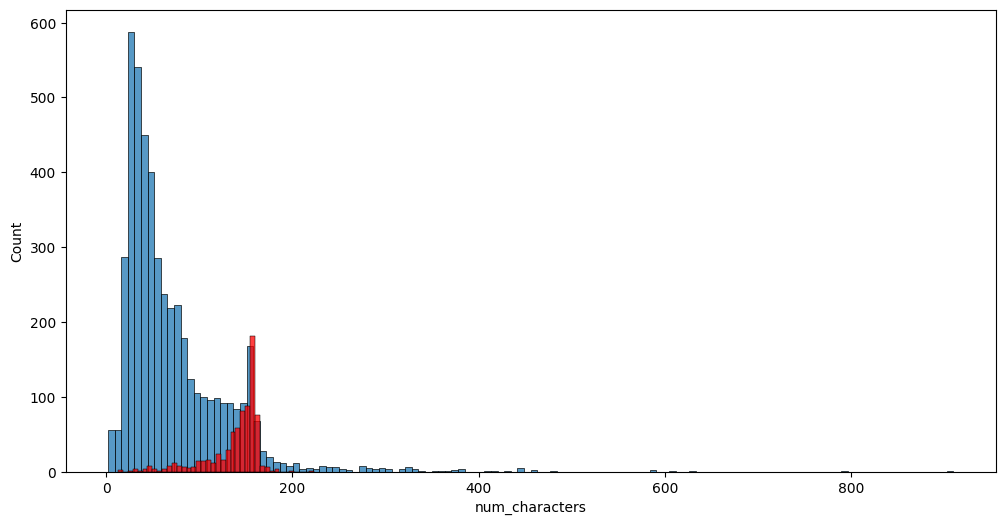

In [49]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_characters'])
sns.histplot(df1[df1['label']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

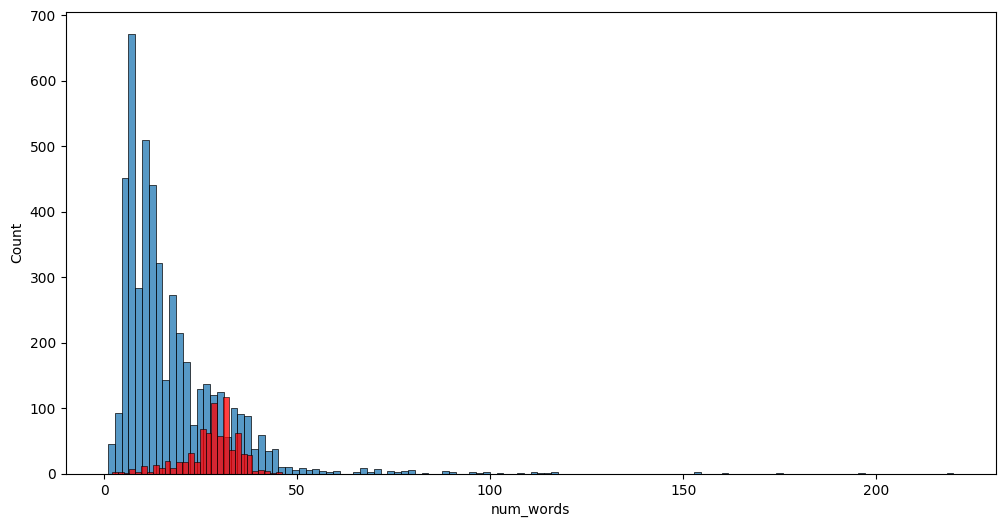

In [50]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_words'])
sns.histplot(df1[df1['label']==1]['num_words'], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

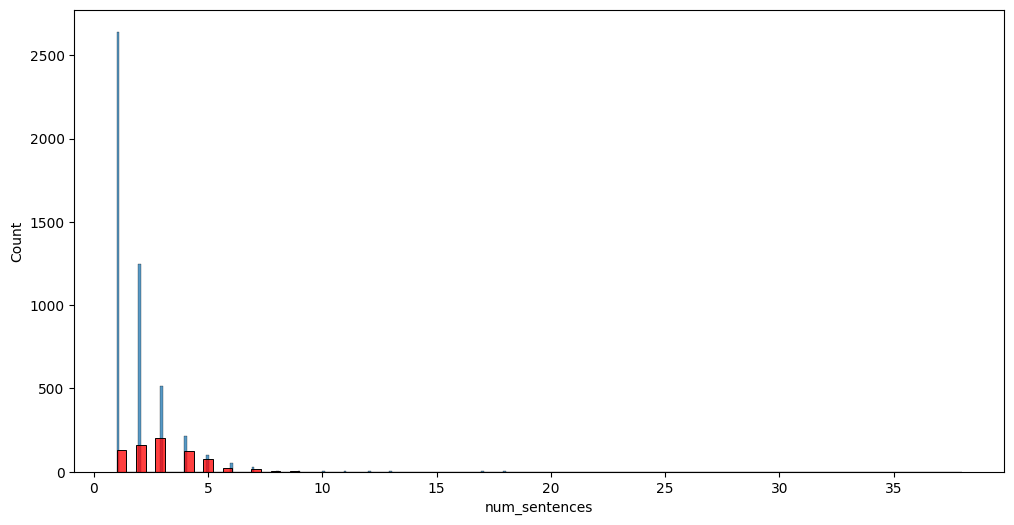

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df1[df1['label']==0]['num_sentences'])
sns.histplot(df1[df1['label']==1]['num_sentences'], color='red')

finding correlations

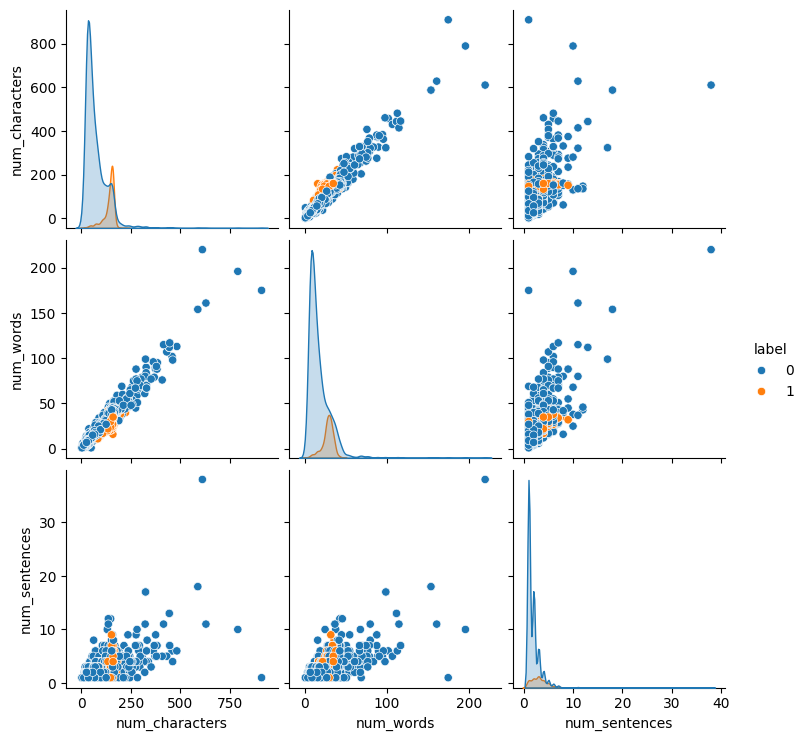

In [52]:
sns.pairplot(df1, hue='label')

In [54]:
df2 = df1.drop(columns=['message'])

In [55]:
df2.corr()

,label,num_characters,num_words,num_sentences
label,1.000000,0.381925,0.259958,0.264230
num_characters,0.381925,1.000000,0.966435,0.630628
num_words,0.259958,0.966435,1.000000,0.685898
num_sentences,0.264230,0.630628,0.685898,1.000000


<Axes: >

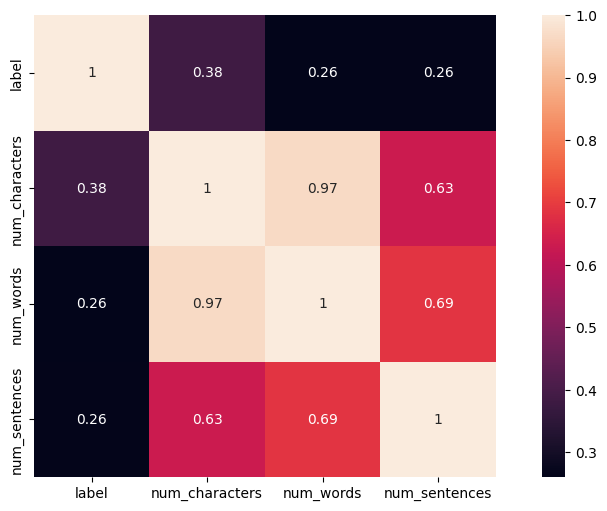

In [56]:
plt.figure(figsize=(12,6))
sns.heatmap(df2.corr(), annot=True, square=True)

data reprocessing

In [57]:
from nltk.corpus import stopwords

In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [68]:
import nltk
nltk.download('stopwords')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [69]:
def transform_text1(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [70]:
df1['message'].apply(transform_text1)

,message
0,go jurong point crazi avail bugi n great world...
1,ok lar joke wif u oni
2,free entri 2 wkli comp win fa cup final tkt 21...
3,u dun say earli hor u c alreadi say
4,nah think goe usf live around though
...,...
5567,2nd time tri 2 contact u pound prize 2 claim e...
5568,ü b go esplanad fr home
5569,piti mood suggest
5570,guy bitch act like interest buy someth els nex...


In [71]:
df1['transformed_message'] = df1['message'].apply(transform_text1)

In [72]:
pip install wordcloud

In [73]:
from wordcloud import WordCloud

In [74]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [75]:
spam_wc = wc.generate(df1[df1['label']==1]['transformed_message'].str.cat(sep=""))

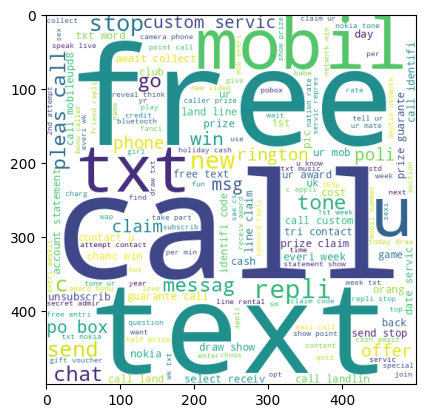

In [76]:
plt.imshow(spam_wc)

In [77]:
ham_wc = wc.generate(df1[df1['label']==0]['transformed_message'].str.cat(sep=""))

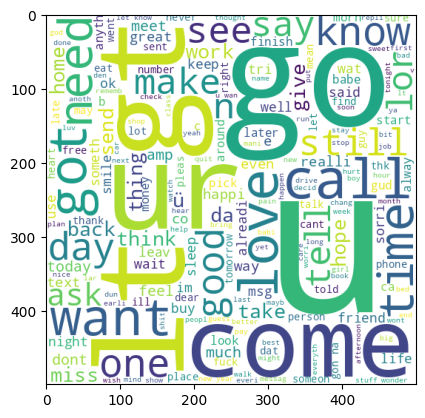

In [78]:
plt.imshow(ham_wc)

In [79]:
df1[df1['label']==1]['transformed_message'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [80]:
spam_corpus = []
for msg in df1[df1['label']==1]['transformed_message'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [81]:
len(spam_corpus)

11544

In [82]:
from collections import Counter
Counter(spam_corpus)

Counter({'free': 219,
         'entri': 26,
         '2': 174,
         'wkli': 14,
         'comp': 10,
         'win': 61,
         'fa': 4,
         'cup': 5,
         'final': 17,
         'tkt': 4,
         '21st': 2,
         'may': 7,
         'text': 139,
         '87121': 4,
         'receiv': 37,
         'question': 12,
         'std': 9,
         'txt': 169,
         'rate': 31,
         'c': 51,
         'appli': 29,
         '08452810075over18': 2,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 23,
         'week': 62,
         'word': 25,
         'back': 23,
         'like': 13,
         'fun': 9,
         'still': 7,
         'tb': 1,
         'ok': 5,
         'xxx': 11,
         'chg': 2,
         'send': 71,
         'rcv': 2,
         'winner': 16,
         'valu': 11,
         'network': 28,
         'custom': 51,
         'select': 31,
         'receivea': 2,
         'prize': 94,
         'reward': 10,
         'claim': 115,
       